In [31]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [32]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [33]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [35]:
import citipy 

In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [37]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [39]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [40]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | bairnsdale
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kahului
Processing Record 7 of Set 1 | nizhniy kuranakh
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | dawei
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | corpus christi
Processing Record 13 of Set 1 | broken hill
Processing Record 14 of Set 1 | gonzales
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | axim
Processing Record 18 of Set 1 | homer
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | jiblah
Processing Record 23

Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 41 of Set 4 | sinjah
City not found. Skipping...
Processing Record 42 of Set 4 | lompoc
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | wenchi
Processing Record 45 of Set 4 | iqaluit
Processing Record 46 of Set 4 | karakol
Processing Record 47 of Set 4 | ulaangom
Processing Record 48 of Set 4 | takoradi
Processing Record 49 of Set 4 | izhma
Processing Record 50 of Set 4 | ambilobe
Processing Record 1 of Set 5 | tasiilaq
Processing Record 2 of Set 5 | kashan
Processing Record 3 of Set 5 | saveh
Processing Record 4 of Set 5 | sovetskiy
Processing Record 5 of Set 5 | xai-xai
Processing Record 6 of Set 5 | shenjiamen
Processing Record 7 of Set 5 | ribeira grande
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | katsuura
Processing Record 10 of Set 5 | mogadishu
Processing Record 11 of Set 5 | grand river south east
City

Processing Record 27 of Set 8 | carutapera
Processing Record 28 of Set 8 | abonnema
Processing Record 29 of Set 8 | pisco
Processing Record 30 of Set 8 | kimbe
Processing Record 31 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 8 | safaqis
City not found. Skipping...
Processing Record 33 of Set 8 | buchanan
Processing Record 34 of Set 8 | nguiu
City not found. Skipping...
Processing Record 35 of Set 8 | pacific grove
Processing Record 36 of Set 8 | paamiut
Processing Record 37 of Set 8 | sobolevo
Processing Record 38 of Set 8 | golden
Processing Record 39 of Set 8 | ambodifototra
City not found. Skipping...
Processing Record 40 of Set 8 | vila velha
Processing Record 41 of Set 8 | elat
Processing Record 42 of Set 8 | buala
Processing Record 43 of Set 8 | buenaventura
Processing Record 44 of Set 8 | pangnirtung
Processing Record 45 of Set 8 | haibowan
City not found. Skipping...
Processing Record 46 of Set 8 | fernley
Processing Record 47 of Set 8 | sangar
P

Processing Record 17 of Set 12 | karakendzha
City not found. Skipping...
Processing Record 18 of Set 12 | batagay-alyta
Processing Record 19 of Set 12 | dagana
Processing Record 20 of Set 12 | agucadoura
Processing Record 21 of Set 12 | sasni
Processing Record 22 of Set 12 | a
City not found. Skipping...
Processing Record 23 of Set 12 | rawson
Processing Record 24 of Set 12 | sorong
Processing Record 25 of Set 12 | ust-omchug
Processing Record 26 of Set 12 | salima
Processing Record 27 of Set 12 | sayyan
Processing Record 28 of Set 12 | topolobampo
Processing Record 29 of Set 12 | yar-sale
Processing Record 30 of Set 12 | san andres
Processing Record 31 of Set 12 | santa cruz
Processing Record 32 of Set 12 | salekhard
Processing Record 33 of Set 12 | popondetta
Processing Record 34 of Set 12 | sulangan
Processing Record 35 of Set 12 | luau
Processing Record 36 of Set 12 | koroni
Processing Record 37 of Set 12 | cairns
Processing Record 38 of Set 12 | meadow lake
Processing Record 39 of

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,53.80,60,91,5.77,NZ,2022-02-04 21:18:52
1,Bairnsdale,-37.8333,147.6167,64.71,95,99,2.19,AU,2022-02-04 21:15:16
2,Albany,42.6001,-73.9662,23.90,86,100,1.01,US,2022-02-04 21:18:01
3,Mataura,-46.1927,168.8643,53.47,88,97,1.52,NZ,2022-02-04 21:17:37
4,Rikitea,-23.1203,-134.9692,78.03,71,9,8.08,PF,2022-02-04 21:17:41
5,Kahului,20.8947,-156.4700,83.46,58,0,9.22,US,2022-02-04 21:09:47
6,Nizhniy Kuranakh,58.8353,125.4869,-5.60,99,100,3.22,RU,2022-02-04 21:19:39
7,Avarua,-21.2078,-159.7750,84.25,74,20,16.11,CK,2022-02-04 21:19:39
8,Nikolskoye,59.7035,30.7861,19.29,94,76,10.09,RU,2022-02-04 21:17:33
9,Dawei,14.0833,98.2000,71.11,91,25,3.53,MM,2022-02-04 21:19:40


In [43]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2022-02-04 21:18:52,-46.6000,168.3333,53.80,60,91,5.77
1,Bairnsdale,AU,2022-02-04 21:15:16,-37.8333,147.6167,64.71,95,99,2.19
2,Albany,US,2022-02-04 21:18:01,42.6001,-73.9662,23.90,86,100,1.01
3,Mataura,NZ,2022-02-04 21:17:37,-46.1927,168.8643,53.47,88,97,1.52
4,Rikitea,PF,2022-02-04 21:17:41,-23.1203,-134.9692,78.03,71,9,8.08


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [46]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644167540.120766

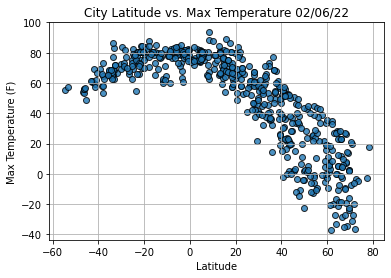

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

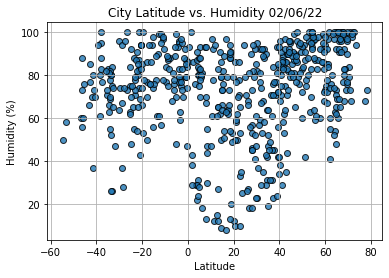

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

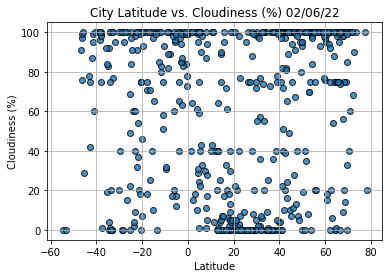

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

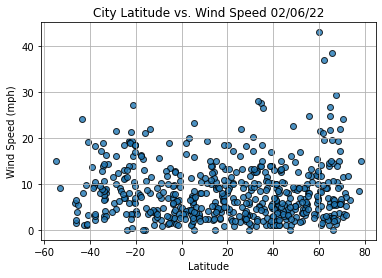

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()